In [2]:
import numpy as np
import pocomc as pc

In [3]:
d = np.load("../results.npz", allow_pickle=True)
results = d["results"][()]
true_params = d["true_params"][()]

In [4]:
bins = list(results.keys())
nfg = list(results[bins[0]].keys())
best = []  # nfg with max evidence

for b in bins:
    print(f"Bin {b}:")
    print("----------")
    bic_min = np.inf
    for n in nfg:
        bic = results[b][n]["bic"]
        if bic < bic_min:
            bic_min = bic
            best_n = n
        chi2_r = bic - (n+3)*np.log(61)
        chi2_r /= (61 - n - 3)
        print(f"nfg={n}, bic={bic:.3f}, chi2_r={chi2_r:.3f}")
    best.append(best_n)
    print("\n")

Bin 0:
----------
nfg=4, bic=96.134, chi2_r=1.247
nfg=5, bic=89.973, chi2_r=1.077
nfg=6, bic=255.671, chi2_r=4.205
nfg=7, bic=111.783, chi2_r=1.386
nfg=8, bic=160.211, chi2_r=2.300


Bin 1:
----------
nfg=4, bic=80.517, chi2_r=0.958
nfg=5, bic=76.820, chi2_r=0.829
nfg=6, bic=168.788, chi2_r=2.534
nfg=7, bic=92.705, chi2_r=1.012
nfg=8, bic=179.734, chi2_r=2.690


Bin 2:
----------
nfg=4, bic=81.414, chi2_r=0.975
nfg=5, bic=84.924, chi2_r=0.982
nfg=6, bic=90.941, chi2_r=1.037
nfg=7, bic=93.978, chi2_r=1.037
nfg=8, bic=220.074, chi2_r=3.497


Bin 3:
----------
nfg=4, bic=101.784, chi2_r=1.352
nfg=5, bic=94.014, chi2_r=1.153
nfg=6, bic=331.046, chi2_r=5.655
nfg=7, bic=120.433, chi2_r=1.555
nfg=8, bic=164.622, chi2_r=2.388


Bin 4:
----------
nfg=4, bic=94.020, chi2_r=1.208
nfg=5, bic=94.237, chi2_r=1.158
nfg=6, bic=354.511, chi2_r=6.106
nfg=7, bic=160.250, chi2_r=2.336
nfg=8, bic=203.937, chi2_r=3.174


Bin 5:
----------
nfg=4, bic=118.689, chi2_r=1.665
nfg=5, bic=100.574, chi2_r=1.277
nfg

In [8]:
def print_stats(results):
    estimated_params = np.mean(results['samples'], axis=0)
    std_vals = np.std(results['samples'], axis=0)
    print('Mean values = ', estimated_params)
    print('Standard deviation values = ', std_vals)
    print()
    print(f"Relative errors %: {100 * np.abs(1 - np.array(list(true_params.values())) /estimated_params)}")
    print(f"Number of sigmas from truth: {np.abs(estimated_params-np.array(list(true_params.values())))/std_vals}")

def plot(r, labels=["a", "w", "$\\nu_{21}$"]):
    #pc.plotting.run(r, width=7, height=7)
    #pc.plotting.trace(r, labels=labels)
    pc.plotting.corner(r, labels=labels, truths=list(true_params.values()), truth_color="k")
    return

In [9]:
print(best)

[5, 5, 4, 5, 4, 5, 4, 5]


Mean values =  [-0.32985818 23.894041   79.290955  ]
Standard deviation values =  [0.05281478 1.7155522  0.32392952]

Relative errors %: [39.36788299 16.29712216  0.8942324 ]
Number of sigmas from truth: [2.45874696 2.26984701 2.18888792]
------------
Mean values =  [-0.24195667 20.874786   79.69143   ]
Standard deviation values =  [0.04655313 1.2497709  0.6614161 ]

Relative errors %: [17.34057044  4.19063631  0.38720709]
Number of sigmas from truth: [0.9012641  0.6999574  0.46653061]
------------
Mean values =  [-0.22160733 19.818602   79.235176  ]
Standard deviation values =  [0.01792071 1.0098207  0.22736892]

Relative errors %: [9.75027663 0.9152936  0.96525805]
Number of sigmas from truth: [1.20571851 0.17963426 3.36380148]
------------
Mean values =  [-0.28912356 22.94144    79.36666   ]
Standard deviation values =  [0.0425197 1.5908703 0.3057783]

Relative errors %: [30.82542406 12.82151647  0.79799115]
Number of sigmas from truth: [2.0960533  1.84895064 2.07123573]
-----------

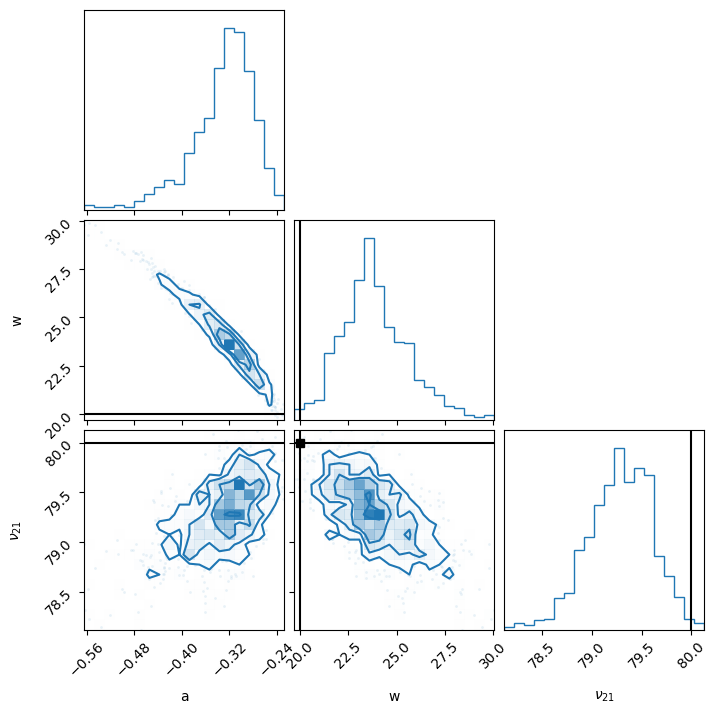

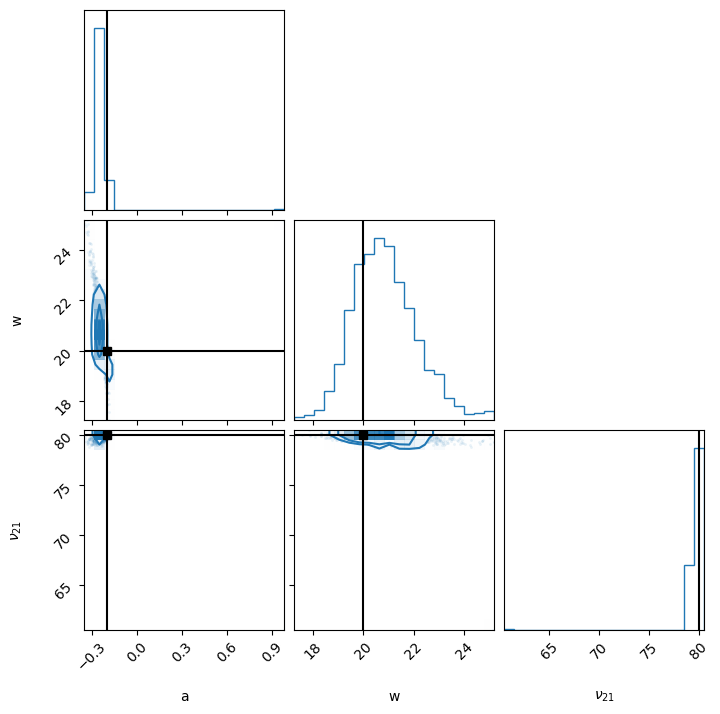

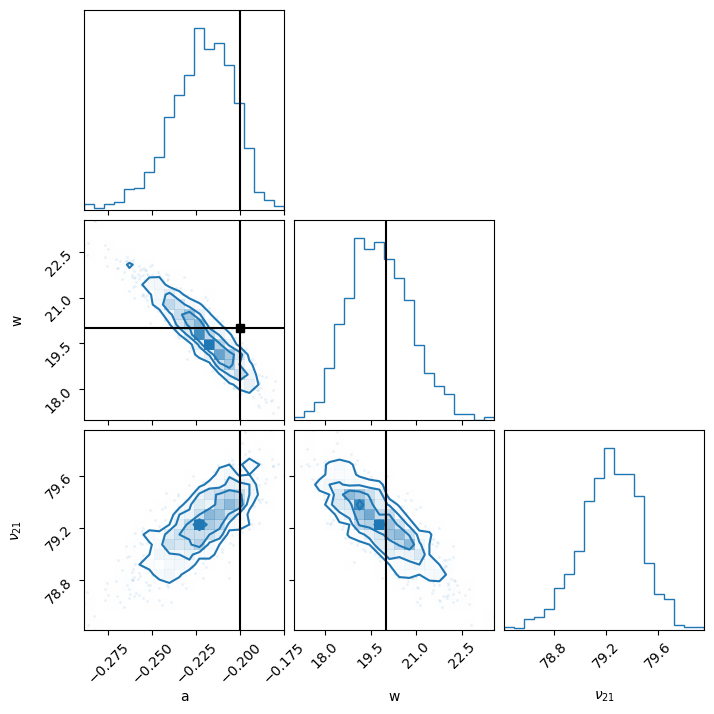

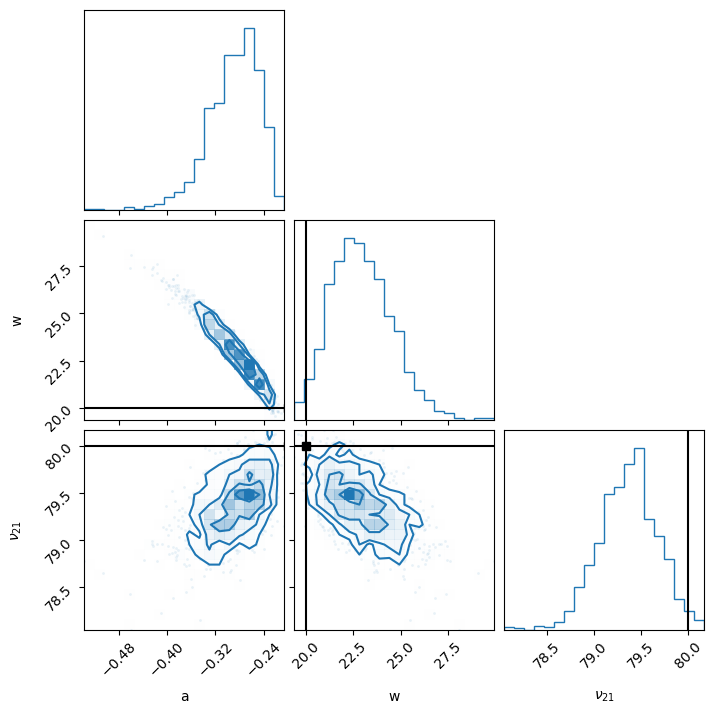

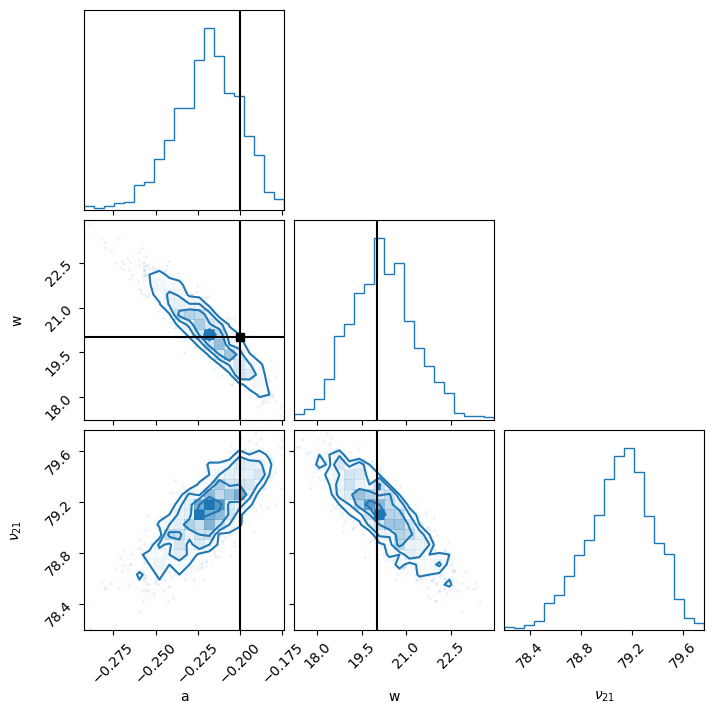

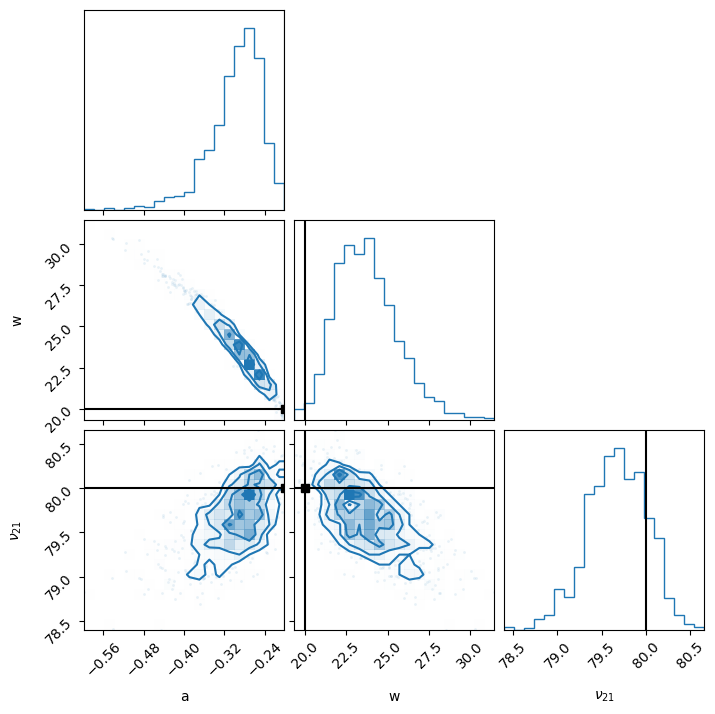

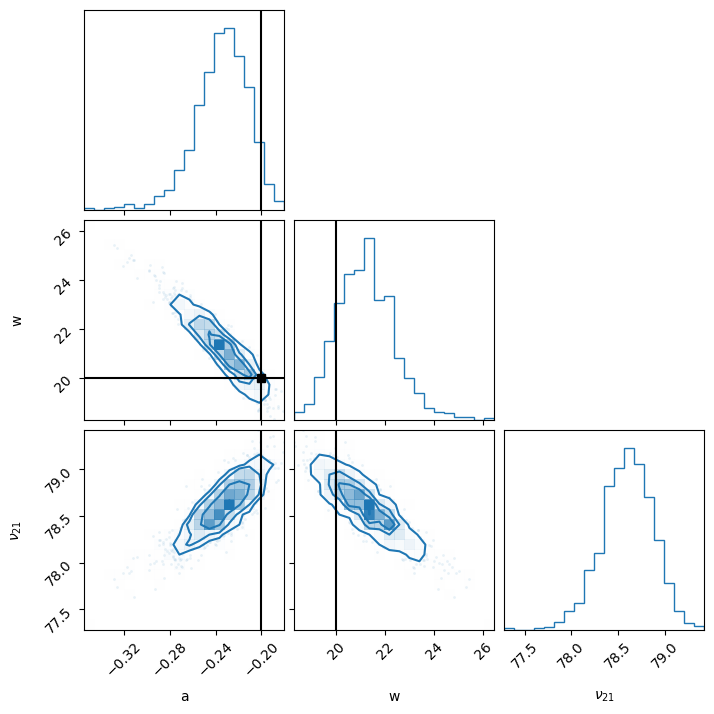

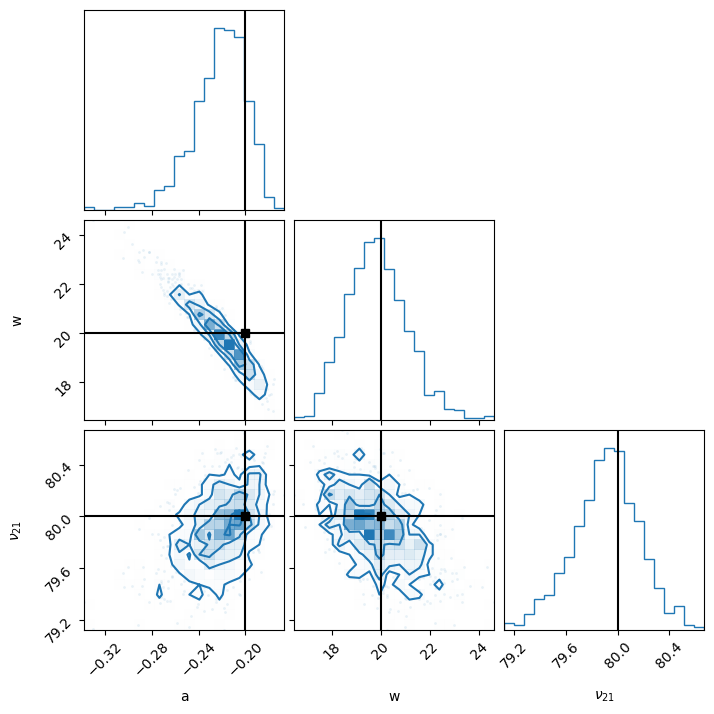

In [10]:
for i in range(len(results)):
    r = results[i][best[i]]
    plot(r)
    print_stats(r)
    print("------------")

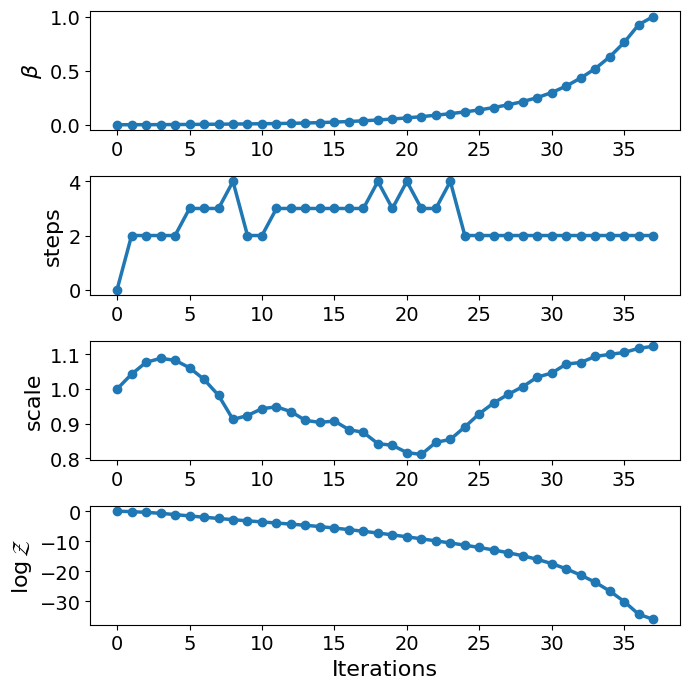

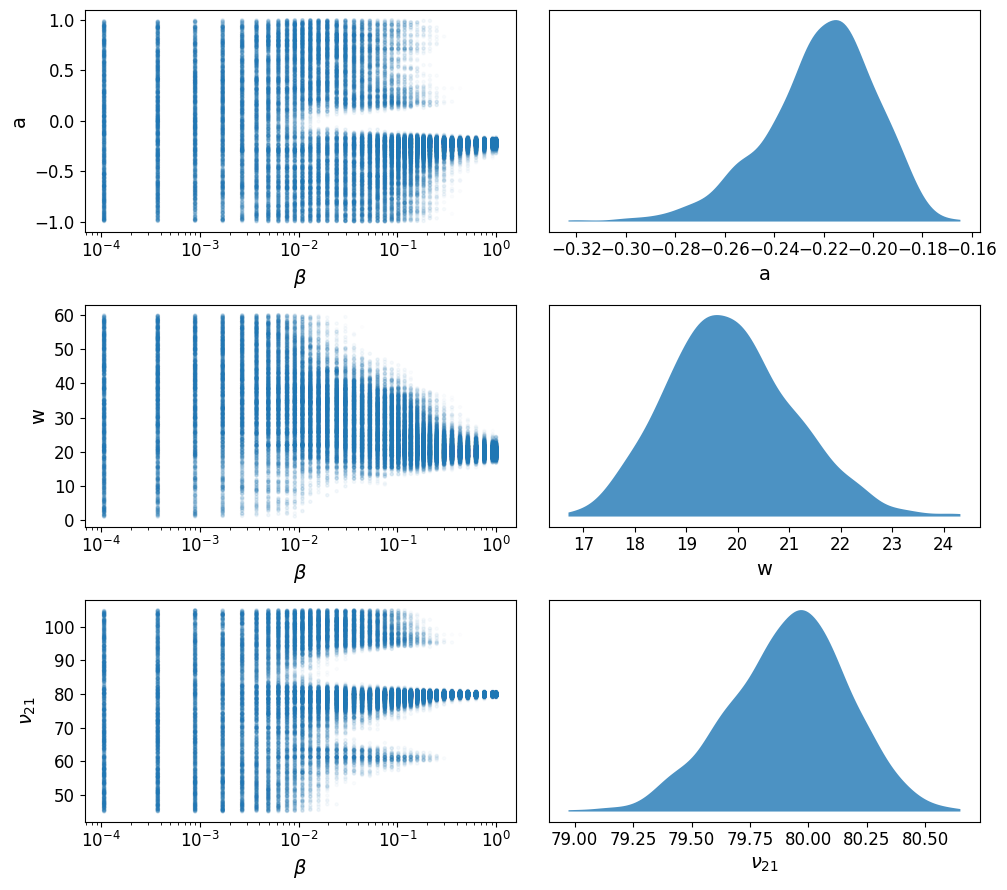

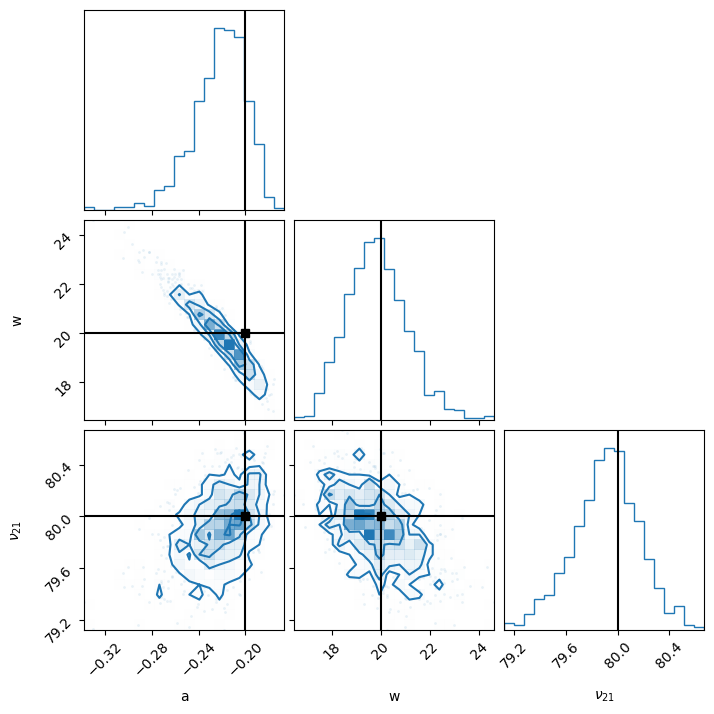

In [11]:
plot(r)